<a href="https://colab.research.google.com/github/viniciusBMontenegro/Projeto-PRF/blob/main/projeto_PRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando bibliotecas necessário para analises
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#importando os arquivos csv e inserido em variaveis dataframe

df_PRF2018 = pd.read_csv('/content/datatran2018.zip', compression='zip',
                         encoding='latin1', sep=';',decimal= ',', low_memory=False)

df_PRF2019 = pd.read_csv('/content/datatran2019.zip', compression='zip',
                         encoding='latin1', sep=';',decimal= ',',  low_memory=False)

df_PRF2020 = pd.read_csv('/content/datatran2020.zip', compression='zip',
                         encoding='latin1', sep=';',decimal= ',',  low_memory=False)

df_PRF2021 = pd.read_csv('/content/datatran2021.zip', compression='zip',
                         encoding='latin1', sep=';', decimal= ',',  low_memory=False)
df_PRF2022 = pd.read_csv('/content/datatran2022.zip', compression='zip',
                         encoding='latin1', sep=';', decimal= ',',  low_memory=False)

In [ ]:
#Efetuando a concatenação dos dados em unico dataframe, utilizando o metodo concat e visaulizando previamente o dataframe
df_PRF = pd.concat([df_PRF2018, df_PRF2019, df_PRF2020, df_PRF2021, df_PRF2022 ], axis = 0, keys=['2018', '2019', '2020', '2021', '2022'], ignore_index = True )
df_PRF.head(5)


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,100027.0,2018-01-01,segunda-feira,06:00:00,TO,153.0,393.1,RIO DOS BOIS,Falta de Atenção à Condução,Colisão frontal,...,1,1,0,1,2,-9.356414,-48.546103,SPRF-TO,DEL02-TO,UOP02-DEL02-TO
1,100044.0,2018-01-01,segunda-feira,08:30:00,SE,101.0,123.4,ITAPORANGA DAJUDA,Não guardar distância de segurança,Colisão traseira,...,0,2,0,0,2,-11.04476,-37.36498,SPRF-SE,DEL02-SE,UOP01-DEL02-SE
2,100046.0,2018-01-01,segunda-feira,08:50:00,TO,153.0,347.0,GUARAI,Falta de Atenção à Condução,Colisão lateral,...,0,2,0,0,2,-8.952295,-48.500107,SPRF-TO,DEL02-TO,UOP02-DEL02-TO
3,100052.0,2018-01-01,segunda-feira,05:30:00,PA,155.0,221.0,ELDORADO DO CARAJAS,Ingestão de Álcool,Colisão lateral,...,0,1,0,0,2,-6.345512,-49.389626,SPRF-PA,DEL03-PA,UOP01-DEL03-PA
4,100053.0,2018-01-01,segunda-feira,10:25:00,BA,116.0,289.6,TUCANO,Ultrapassagem Indevida,Saída de leito carroçável,...,1,0,0,1,1,-11.086617,-38.834202,SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA


Analisando os tipos de dados presentes na coluna do dataframe, para verificar se será necessário efetuar conversões, veriricar se constam dados nulos ou NAN

In [ ]:
#Usado o método info() para ter um resumo da situação das colunas, tipos dos dados, quantidade de nulos
df_PRF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329550 entries, 0 to 329549
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      329550 non-null  float64
 1   data_inversa            329550 non-null  object 
 2   dia_semana              329550 non-null  object 
 3   horario                 329550 non-null  object 
 4   uf                      329550 non-null  object 
 5   br                      328814 non-null  float64
 6   km                      328814 non-null  float64
 7   municipio               329550 non-null  object 
 8   causa_acidente          329550 non-null  object 
 9   tipo_acidente           329510 non-null  object 
 10  classificacao_acidente  329550 non-null  object 
 11  fase_dia                329550 non-null  object 
 12  sentido_via             329550 non-null  object 
 13  condicao_metereologica  329550 non-null  object 
 14  tipo_pista          

Verificado que será necessário converter a coluna 'data_inversa' para o tipo datetime.

Além disso, será necessário converter as colunas 'latitude' e 'longitude' de object para float.

In [ ]:
#Fazendo a corversão de object para datetime usando o to_datetime, usado astype para converter de object para float
df_PRF['data_inversa'] = pd.to_datetime(df_PRF['data_inversa'])
df_PRF['latitude'] = df_PRF['latitude'].astype(float)
df_PRF['longitude'] = df_PRF['longitude'].astype(float)

In [ ]:
#Conferindo se as alterações foram realizadas com sucesso
df_PRF[['data_inversa','latitude','longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329550 entries, 0 to 329549
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data_inversa  329550 non-null  datetime64[ns]
 1   latitude      329550 non-null  float64       
 2   longitude     329550 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.5 MB


A função abaixo serve para exibir a tabela de frequência de dados quantitativos com muitos itens distintos, onde essa função recebe como parâmetros os atributos (df, val_bins), onde:

*df que se recebe uma coluna de dataframe,

*val_bins recebe a quantidade de classes que seram trabalhadas, deve ser repassado tipo inteiro.
* decimal - recebe um número inteiro com a quantidade de casas decimais do arredndamento

In [ ]:
def dist_quanti_distinta(df, val_bins='auto', decimal = 2):
    #Calculando frequência absoluta e bordas das classes
    freq, classes = np.histogram(df,bins = val_bins )
    freq, classes
#Calculando frequência relativa
    freq_rel = np.around(freq/ freq.sum()*100,decimals=2)
#Calculando frequência cumulativa
    freq_cum = freq_rel.cumsum()
    #Lista que dará a criação do dataframe
    distribuicao=[]
    #Lista que receberá os valores temporariamente
    pilha = []

    for i in range(0, len(freq)):
    #classe
        pilha.append(f"{round(classes[i], decimal )} |-- {round(classes[i+1], decimal )}")
        pilha.append(freq[i])
        pilha.append(freq_rel[i])
        pilha.append(freq_cum[i])
        distribuicao.append(pilha[:])
        pilha.clear()

    tab_distr= pd.DataFrame(distribuicao, columns =['Classes', 'Freq. Absoluta',
                                                'Freq. Relativa(%)','Freq. Cumulativa(%)'])
    #Retorna tabela de distribuição montada
    return tab_distr

A função abaixo serve para exibir a tabela de frequência de dados qualitativos ou quantitativos (com poucos itens distintos), onde essa função recebe como parâmetros os atributos (df,nome_coluna, quantitativa), onde:

*df- Recebe um dataframe que será trabalhado;

*nome_coluna - nome da coluna do dataframe que deseja ser exibida, deve ser repassada em formato de string;

*quantitativa - quando o tipo de dado é quantitativo, tendo como padrão False.


In [ ]:
#Criando função que exiba a tabela de distribuição de dados quanlitativos
#O atributo df recebe recebe um dataframe
#O atribuito nome_coluna recebe 1 string com o nome da coluna (do dataframe passado) que deseja ser calculado a distribuição
#Atributo quantitativa quando se trata de dados quantitativos com pouca distinção ele ordena os dados, seu padrão é falso
def dist_qualit(df, nome_coluna, quantitativa = False):
#isolando coluna bairro e calculando sua frequência absoluta
    frame = df[nome_coluna].value_counts().to_frame()
    #Validando se trata-se dados quantitativo ou qualitativo
    if quantitativa == True:
        frame.sort_index(inplace=True)
    frame.reset_index(inplace=True)
#Organizando dataframe bairro
    frame.rename(columns={'index': nome_coluna, nome_coluna: 'Freq. Absoluta'}, inplace=True)
#calculando frequência relativa
    frame['Proporção(%)'] = round(frame['Freq. Absoluta'] / frame['Freq. Absoluta'].sum() * 100, 2)
#calculando frequência cumulativa
    frame['Freq. Cumulativa(%)'] = frame['Proporção(%)'].cumsum()
    return frame

Será utilizado as funções criadas acima para montar uma tabela de distruibibuição de frequência para a quantidade de acidentes registradas em cada ano e uma tabela para registrar a quantidade de acidentes que ocorreram em cada dia da semana.


In [ ]:
anos = df_PRF['data_inversa'].dt.year.to_frame()
anos = dist_qualit(anos,'data_inversa', quantitativa = True)
anos

,data_inversa,Freq. Absoluta,Proporção(%),Freq. Cumulativa(%)
0,2018,69332,21.04,21.04
1,2019,67556,20.50,41.54
2,2020,63576,19.29,60.83
3,2021,64539,19.58,80.41
4,2022,64547,19.59,100.00


<Axes: title={'center': 'Quantidade de acidentes por ano'}, xlabel='Anos', ylabel='Quant. de acidentes'>

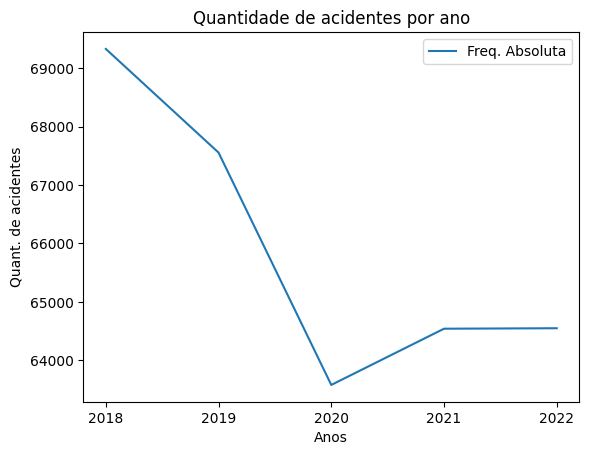

In [ ]:
#Para facilitar a visualização será plotado um gráfico com os dados da frequencia absoluta da tabela, usando método interno do pandas.

anos.plot(kind='line', x='data_inversa', y='Freq. Absoluta', title ='Quantidade de acidentes por ano', xlabel = 'Anos', ylabel = 'Quant. de acidentes', xticks = [2018, 2019, 2020, 2021, 2022])

In [ ]:
semana = df_PRF['dia_semana'].to_frame()
semana = dist_qualit(semana,'dia_semana')
semana

,dia_semana,Freq. Absoluta,Proporção(%),Freq. Cumulativa(%)
0,sábado,54835,16.64,16.64
1,domingo,54812,16.63,33.27
2,sexta-feira,50923,15.45,48.72
3,segunda-feira,44555,13.52,62.24
4,quinta-feira,42676,12.95,75.19
5,quarta-feira,41317,12.54,87.73
6,terça-feira,40432,12.27,100.00


<Axes: title={'center': 'Quantidade de acidentes por dia da semana'}, xlabel='dia_semana'>

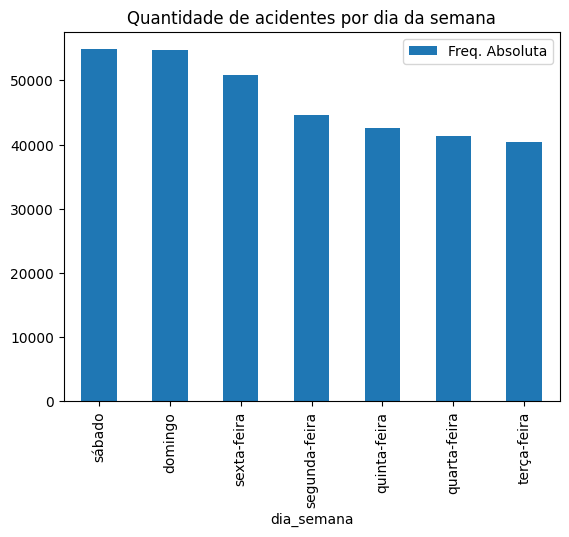

In [ ]:
#Para facilitar a visualização será plotado um gráfico com os dados da frequencia absoluta da tabela

semana.plot(kind='bar', x='dia_semana', y='Freq. Absoluta', title ='Quantidade de acidentes por dia da semana')

In [ ]:
horas = pd.to_datetime(df_PRF['horario']).to_frame()
horas = horas['horario'].dt.hour.to_frame()
dist_quanti_distinta(horas, val_bins = 8, decimal = 0)


,Classes,Freq. Absoluta,Freq. Relativa(%),Freq. Cumulativa(%)
0,0.0 |-- 3.0,19063,5.78,5.78
1,3.0 |-- 6.0,22743,6.90,12.68
2,6.0 |-- 9.0,49246,14.94,27.62
3,9.0 |-- 12.0,41626,12.63,40.25
4,12.0 |-- 14.0,43576,13.22,53.47
5,14.0 |-- 17.0,57307,17.39,70.86
6,17.0 |-- 20.0,62500,18.97,89.83
7,20.0 |-- 23.0,33489,10.16,99.99


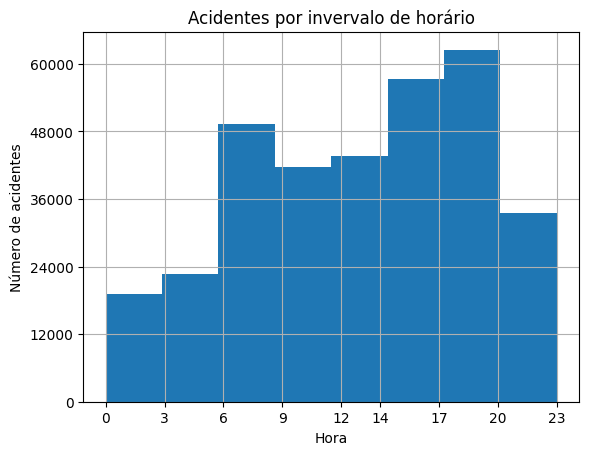

In [ ]:
freq, classe, x = plt.hist(horas, bins = 8)
classe = np.around(classe, decimals = 0)
plt.title('Acidentes por invervalo de horário')
plt.xlabel('Hora')
plt.ylabel('Número de acidentes')
plt.xticks(classe)
plt.yticks(range(0, 65000, 12000))
plt.grid()

Foi constatado uma leve diminuição na quantidade de ocorrencias policiais registradas nos anos de 2020 e 2021 (epoca da pandemia da covid-19), uma possivel causa seria devido as campanhas de distanciamento social, lock-donw de algumas cidades.


Além disso, a maioria dos acidentes de trãnsito ocorrem nos finais de semana (sexta-feira, sábado, domingo), uma poossivel causa para esse tipo de comportamento seria que várias pessoas estão de folgas dos seu trabalhos e vão viajar, frequentar bares/restaurantes.


Conforme histograma é possivel verificar como os acidentes de trânsito se distruibuem conforme as 24 horas do dia, os momentos com maior concentração foi das 17:00 as 20:00, 14:00 as 17:00 e 06:00 as 09:00 com respectivamente 62500; 57307 e 49246.

In [ ]:
#Criado uma variavel para receber a quantidade de ocorrencias ocorridas por estado em cada ano

uf_df = df_PRF['uf'].groupby( df_PRF['data_inversa'].dt.year).value_counts().to_frame()
uf_df = uf_df.rename(columns={'uf': 'ocorrencias'}).reset_index()
uf_df.sort_values(by = ['data_inversa','ocorrencias'], inplace = True)
uf_df.head(5)


,data_inversa,uf,ocorrencias
26,2018,AM,124
25,2018,AP,173
24,2018,RR,236
23,2018,AC,238
22,2018,SE,559


In [ ]:
#Os 3 estados com o maior e menor número de ocorrencias de acidentes registrados no anos anos

anos = uf_df['data_inversa'].unique()

for a in anos:
# Utilizado um if para facilitar a criação dos dataframe, para que possa ocorrer concatenação
  if a == anos[0]:
# Como se trata do primeiro laço, precisa apenas atribuir valores as variaveis
    Top_Mais_Acid_df = uf_df[uf_df['data_inversa'] == a].sort_values(by = 'ocorrencias', ascending = False).head(3)
    Top_Menos_Acid_df = uf_df[uf_df['data_inversa'] == a].sort_values(by = 'ocorrencias', ascending = False).tail(3)

  else:
#Como não é mais o primeiro caso, é necessário a criação de uma pilha para receber os dados e concatenar nos df criados anteriormente
    pilha1 = uf_df[uf_df['data_inversa'] == a].sort_values(by = 'ocorrencias', ascending = False).head(3)
    pilha2 = uf_df[uf_df['data_inversa'] == a].sort_values(by = 'ocorrencias', ascending = False).tail(3)

    Top_Mais_Acid_df = pd.concat([Top_Mais_Acid_df, pilha1], ignore_index= True)
    Top_Menos_Acid_df = pd.concat([Top_Menos_Acid_df, pilha2], ignore_index= True)


In [ ]:
Top_Mais_Acid_df.head(4)

,data_inversa,uf,ocorrencias
0,2018,MG,9073
1,2018,SC,8499
2,2018,PR,7958
3,2019,MG,8736


In [ ]:
Top_Menos_Acid_df.head(4)

,data_inversa,uf,ocorrencias
0,2018,RR,236
1,2018,AP,173
2,2018,AM,124
3,2019,RR,237


Sobre as cidades que ocorrem mais acidentes foi verificado que ao decorrer dos anos não ocorreu alteração na ordem dos estados apresentados, a ocorrencia do estado de MG como um dos primeiros é esperado por se tratar de um dos estados mais populosos do Brasil.


Já em questão aos estados com menos quantidade de acidentes, é verificado a predominancia de cidades da região norte do país, tendo apenas algumas alterações de colocações a partir do ano de 2021.

In [ ]:
#Criado um novo dataframe para receber a quantidade de ocorrências registradas em cada municipio durante os anos de analise

municipio_df = df_PRF['municipio'].groupby(df_PRF['data_inversa'].dt.year).value_counts().to_frame()
municipio_df = municipio_df.rename(columns = {'municipio': 'Qnt de ocorrencias'}).reset_index()

municipio_df.head(6)

,data_inversa,municipio,Qnt de ocorrencias
0,2018,CURITIBA,1020
1,2018,SAO JOSE,874
2,2018,BRASILIA,867
3,2018,GUARULHOS,756
4,2018,PALHOCA,688
5,2018,SERRA,570


In [ ]:
#Passado informações registradas no dataframe para um arquivo csv, com o separador ';'
municipio_df.to_csv('municipio.csv', sep = ';', encoding='utf-8', index = False)

In [ ]:
acidente_df = df_PRF['causa_acidente'].to_frame()
acidente_df = dist_qualit(acidente_df,'causa_acidente')


As 10 causas de acidentes mais comum são:

In [ ]:
acidente_df.head(10)

,causa_acidente,Freq. Absoluta,Proporção(%),Freq. Cumulativa(%)
0,Falta de Atenção à Condução,73278,22.24,22.24
1,Velocidade Incompatível,30509,9.26,31.50
2,Desobediência às normas de trânsito pelo condutor,24100,7.31,38.81
3,Ingestão de Álcool,15693,4.76,43.57
4,Reação tardia ou ineficiente do condutor,15346,4.66,48.23
5,Ausência de reação do condutor,13182,4.00,52.23
6,Não guardar distância de segurança,12094,3.67,55.90
7,Condutor Dormindo,11702,3.55,59.45
8,Defeito Mecânico no Veículo,11201,3.40,62.85
9,Acessar a via sem observar a presença dos outr...,10795,3.28,66.13


Já as 10 causas de acidentes mais raras são:

In [ ]:
acidente_df.sort_values(by = 'Freq. Absoluta', ascending = True).head(10)

,causa_acidente,Freq. Absoluta,Proporção(%),Freq. Cumulativa(%)
85,Sistema de drenagem ineficiente,4,0.00,100.05
84,Sinalização encoberta,5,0.00,100.05
83,Faróis desregulados,16,0.00,100.05
82,Redutor de velocidade em desacordo,17,0.01,100.05
81,Semáforo com defeito,18,0.01,100.04
80,Modificação proibida,19,0.01,100.03
79,Participar de racha,20,0.01,100.02
78,Transitar na calçada,22,0.01,100.01
77,Restrição de visibilidade em curvas verticais,25,0.01,100.00
76,Deixar de acionar o farol da motocicleta (ou s...,27,0.01,99.99


In [ ]:
fase_dia_df = df_PRF['fase_dia'].groupby(df_PRF['data_inversa'].dt.year).value_counts().to_frame()
fase_dia_df = fase_dia_df.rename(columns = {'fase_dia' : 'Qnt de ocorrencias' }).reset_index()
fase_dia_df.head(5)

,data_inversa,fase_dia,Qnt de ocorrencias
0,2018,Pleno dia,38410
1,2018,Plena Noite,23836
2,2018,Anoitecer,3764
3,2018,Amanhecer,3322
4,2019,Pleno dia,36975


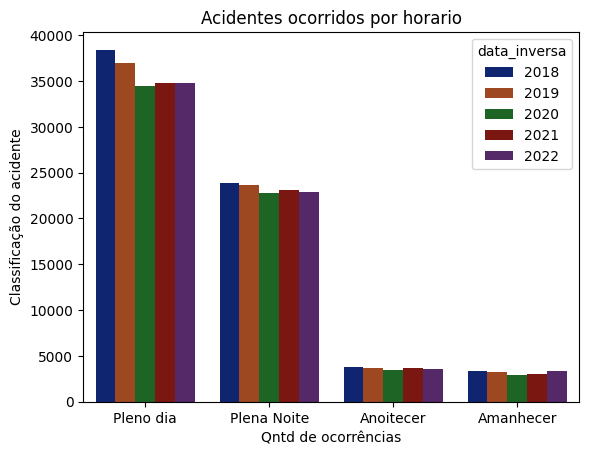

In [ ]:
grafico = sns.barplot(x = 'fase_dia', y = 'Qnt de ocorrencias', hue = 'data_inversa', data = fase_dia_df, palette = 'dark')
grafico.set(title='Acidentes ocorridos por horario', ylabel='Classificação do acidente', xlabel='Qntd de ocorrências');

In [ ]:
clima = df_PRF['condicao_metereologica'].to_frame()
clima = dist_qualit(clima,'condicao_metereologica')
clima

,condicao_metereologica,Freq. Absoluta,Proporção(%),Freq. Cumulativa(%)
0,Céu Claro,194039,58.88,58.88
1,Nublado,56138,17.03,75.91
2,Chuva,36660,11.12,87.03
3,Sol,23437,7.11,94.14
4,Garoa/Chuvisco,11305,3.43,97.57
5,Ignorado,4621,1.40,98.97
6,Nevoeiro/Neblina,2656,0.81,99.78
7,Vento,674,0.20,99.98
8,Granizo,13,0.00,99.98
9,Neve,7,0.00,99.98


No dataframe acima foi verificado os principais motivos dos acidentes registrados pela PRF ao longo dos 5 anos estudados, onde as principais causas apontadas são relacionadas a má condutas do condutor, com grande maioria dos casos imprudência dos motoristas, um insign que pode ser tirado dessa informação seria o orgão analisar novas maneiras de orientar/reeducar os condutores sobre a forma que estão conduzindo, reforçando a necessidade de prestão atenção ao transito, visto que, mais de 25% dos casos resgistrados são referente a esse topico (se somado as proporções de algumas linhas como Falta de Atenção à Condução, Não guardar distância de segurança e entre outros pontos relacionados a falta de atenção).

Outro ponto que fortalece essa condição dita acima é que a maior parcela de acidentes ocorrem durante o periodo do dia e em condições meteriologicas que não prejudciam a visibilidade.

<Axes: title={'center': 'Quantidade de acidentes por ano'}, xlabel='Anos', ylabel='Quant. de acidentes'>

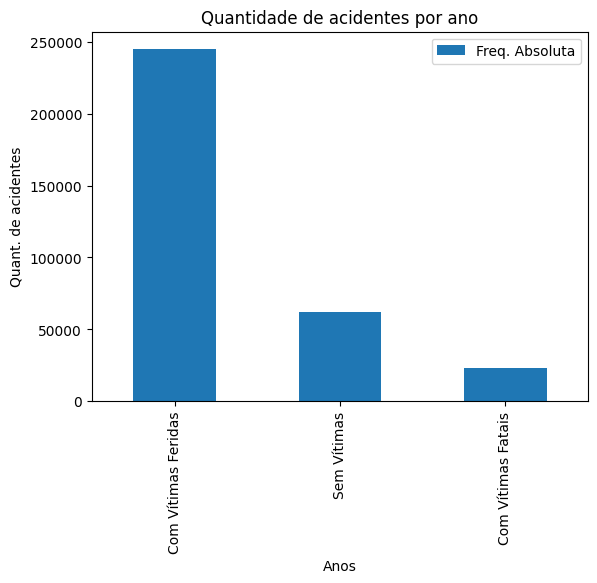

In [ ]:
#Analisando os dados brutos da coluna classificação de acidente
classifica_df = df_PRF['classificacao_acidente'].to_frame()
classifica_df = dist_qualit(classifica_df,'classificacao_acidente')
classifica_df.plot(kind='bar', x='classificacao_acidente', y='Freq. Absoluta', title ='Quantidade de acidentes por ano', xlabel = 'Anos', ylabel = 'Quant. de acidentes')

In [ ]:
#Separando cada tipo de classificaão por ano

classificacao_df = df_PRF['classificacao_acidente'].groupby(df_PRF['data_inversa'].dt.year).value_counts().to_frame()
classificacao_df = classificacao_df.rename(columns = {'classificacao_acidente' : 'Qnt de ocorrencias' }).reset_index()
classificacao_df

,data_inversa,classificacao_acidente,Qnt de ocorrencias
0,2018,Com Vítimas Feridas,49571
1,2018,Sem Vítimas,15254
2,2018,Com Vítimas Fatais,4507
3,2019,Com Vítimas Feridas,51275
4,2019,Sem Vítimas,11684
5,2019,Com Vítimas Fatais,4597
6,2020,Com Vítimas Feridas,47450
7,2020,Sem Vítimas,11601
8,2020,Com Vítimas Fatais,4525
9,2021,Com Vítimas Feridas,48186


Devido a quantidade de vitimas com feridas ser muito superior ao número de vitimas fatais e sem vitimas, será separado em 2 graficos diferentes, para que possa ser analisado corretamente, sem interferencia das escalas muito divergentes

In [ ]:
#Separando os dados do classificacao_df em 2 variaveis diferentes
Feridos_df = classificacao_df[classificacao_df['classificacao_acidente'] == 'Com Vítimas Feridas']
Fatais_df = classificacao_df[classificacao_df['classificacao_acidente'] == 'Com Vítimas Fatais']
Sem_Vitimas_df = classificacao_df[classificacao_df['classificacao_acidente'] == 'Sem Vítimas']


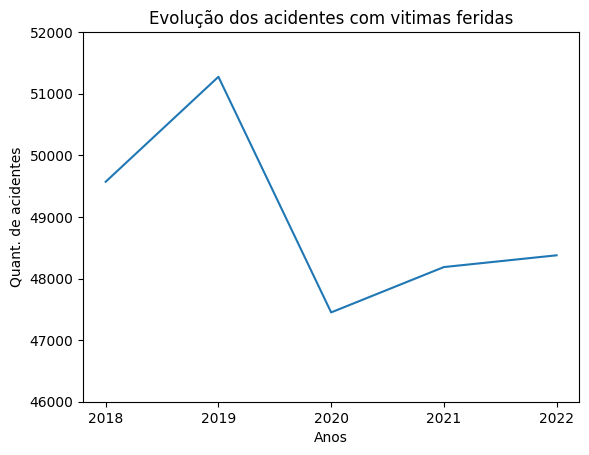

In [ ]:
feridos = sns.lineplot(x = 'data_inversa', y = 'Qnt de ocorrencias', data = Feridos_df)
feridos.set(title='Evolução dos acidentes com vitimas feridas', ylabel='Quant. de acidentes', xlabel='Anos', xticks = [2018, 2019, 2020, 2021, 2022], yticks = range(46000, 53000, 1000));

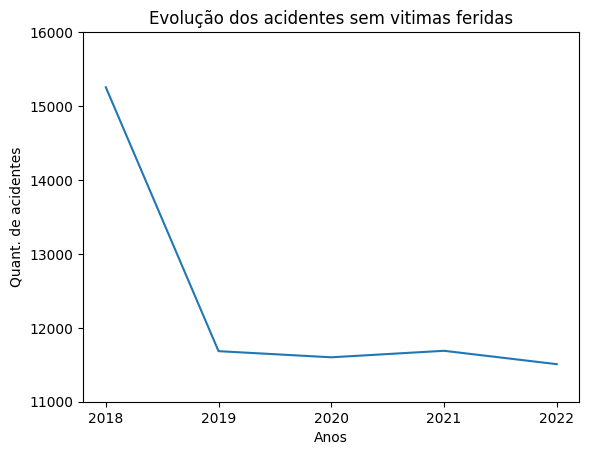

In [ ]:
SemVitimas =  sns.lineplot(x = 'data_inversa', y = 'Qnt de ocorrencias', data = Sem_Vitimas_df)
SemVitimas.set(title='Evolução dos acidentes sem vitimas feridas', ylabel='Quant. de acidentes', xlabel='Anos', xticks = [2018, 2019, 2020, 2021, 2022], yticks = range(11000, 17000, 1000));

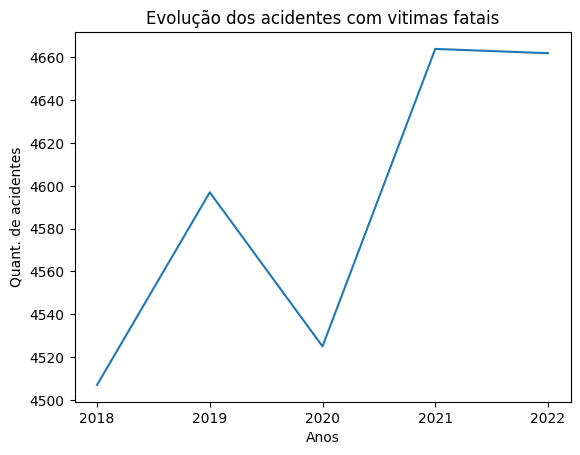

In [ ]:
Fatais =  sns.lineplot(x = 'data_inversa', y = 'Qnt de ocorrencias', data = Fatais_df)
Fatais.set(title='Evolução dos acidentes com vitimas fatais', ylabel='Quant. de acidentes', xlabel='Anos', xticks = [2018, 2019, 2020, 2021, 2022]);

com base na quantidade de acidentes por anos (conforme tabela e gráfico abaixo) vemos uma breve diminuição quantidade de acidentes de trânsito e no número de mortos, com o começo da pandemia (começo de 2020), entretanto, constata-se que após 01 ano do começo da pandemia foi notado aumento da quantidade de acidentes e mortes(conforme gráfico);

Com base nos dados apresentados podemos concluir que de fato a pandemia teve um pequeno impacto para redução de acidentes de trânsitos, entretanto, essa influência foi muito inferior ao que se esperava (uma grande redução da quantidade de acidentes, pois grande parte da população deveriam estar em suas residências).

A seguir é mostrado a tabela de distribuição de frequencia, da quantidade de acidentes ocorridos por tipo de pista, pela quantidade de pessoas e veículos envolvidas no acidente.

In [ ]:
pista = df_PRF['tipo_pista'].to_frame()
pista = dist_qualit(pista,'tipo_pista')
pista


,tipo_pista,Freq. Absoluta,Proporção(%),Freq. Cumulativa(%)
0,Simples,165914,50.35,50.35
1,Dupla,136252,41.34,91.69
2,Múltipla,27384,8.31,100.00


In [ ]:
pessoas = df_PRF['pessoas']
pessoas = dist_quanti_distinta(pessoas, val_bins = 10, decimal = 0)
pessoas

,Classes,Freq. Absoluta,Freq. Relativa(%),Freq. Cumulativa(%)
0,1.0 |-- 9.0,327292,99.31,99.31
1,9.0 |-- 17.0,1673,0.51,99.82
2,17.0 |-- 25.0,249,0.08,99.90
3,25.0 |-- 33.0,112,0.03,99.93
4,33.0 |-- 40.0,74,0.02,99.95
5,40.0 |-- 48.0,87,0.03,99.98
6,48.0 |-- 56.0,50,0.02,100.00
7,56.0 |-- 64.0,6,0.00,100.00
8,64.0 |-- 72.0,2,0.00,100.00
9,72.0 |-- 80.0,5,0.00,100.00


In [ ]:
veiculos = df_PRF['veiculos'].to_frame()
dist_quanti_distinta(veiculos, val_bins=8, decimal = 0)

,Classes,Freq. Absoluta,Freq. Relativa(%),Freq. Cumulativa(%)
0,1.0 |-- 4.0,323546,98.18,98.18
1,4.0 |-- 6.0,5708,1.73,99.91
2,6.0 |-- 9.0,240,0.07,99.98
3,9.0 |-- 12.0,31,0.01,99.99
4,12.0 |-- 15.0,22,0.01,100.00
5,15.0 |-- 18.0,1,0.00,100.00
6,18.0 |-- 20.0,0,0.00,100.00
7,20.0 |-- 23.0,2,0.00,100.00


Nas distribuições de classe dos quantidade de pessoas e veículos envolvidos no acidennte, foi constatado uma acumulação muito grande dos dados na primeira classe, neste caso, será efetuado uma filtrando em ambos os casos e analisado como a distribuição de acidentes está ocorrendo dentro de cada classe.

In [ ]:
pessoas_filtrado = df_PRF[df_PRF['pessoas'] < 11]
pessoas_filtrado = pessoas_filtrado['pessoas'].value_counts().to_frame().reset_index()
pessoas_filtrado.rename(columns = {'index': 'pessoas', 'pessoas': 'ocorrencias'}, inplace = True)
pessoas_filtrado.insert(2, 'Proporcao(%)', round((pessoas_filtrado['ocorrencias'] / pessoas_filtrado['ocorrencias'].sum() * 100), 2 ))
pessoas_filtrado


,pessoas,ocorrencias,Proporcao(%)
0,2,137087,41.76
1,1,89230,27.18
2,3,56990,17.36
3,4,23235,7.08
4,5,11632,3.54
5,6,5343,1.63
6,7,2504,0.76
7,8,1271,0.39
8,9,658,0.20
9,10,359,0.11


In [ ]:
veiculos_filtrado = df_PRF[df_PRF['veiculos'] < 6]
veiculos_filtrado = veiculos_filtrado['veiculos'].value_counts().to_frame().reset_index()
veiculos_filtrado.rename(columns = {'index': 'veiculos', 'veiculos': 'ocorrencias'}, inplace = True)
veiculos_filtrado.insert(2, 'Proporcao(%)', round((veiculos_filtrado['ocorrencias'] / veiculos_filtrado['ocorrencias'].sum() * 100), 2 ))
veiculos_filtrado

,veiculos,ocorrencias,Proporcao(%)
0,2,155055,47.15
1,1,149517,45.47
2,3,18974,5.77
3,4,4103,1.25
4,5,1182,0.36


Após reanalisar os dados que estavam extremamente concentrados, é possivel perceber que parcela significativa dos acidentes possuem até 3 pessoas envolvidas (cerca de 86%) já sobre os veículos grande parte dos acidentes envolvem até 2 veículos com cerca de mais de 90% das ocorrencias.

Agora iremos analisar a quantidade de acidentes que foram registrado em cada unidade Reginal da PRF

In [ ]:
regional_df = df_PRF['regional'].to_frame()
regional_df = dist_qualit(regional_df,'regional')
regional_df.head(5)

,regional,Freq. Absoluta,Proporção(%),Freq. Cumulativa(%)
0,SPRF-MG,42707,12.96,12.96
1,SPRF-SC,39792,12.07,25.03
2,SPRF-PR,37399,11.35,36.38
3,SPRF-RS,22732,6.90,43.28
4,SPRF-RJ,22698,6.89,50.17


[Text(0.5, 1.0, 'Acidentes registrados em cada SPRF'),
 Text(0, 0.5, 'Quantidade de acidentes'),
 Text(0.5, 0, 'Estado da regional')]

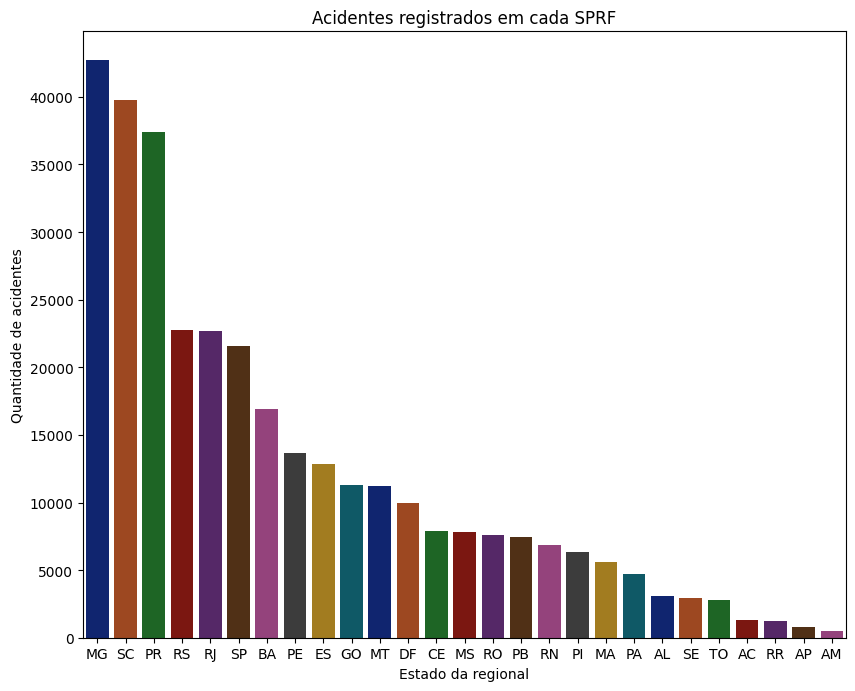

In [ ]:
#Como o grafico terá uma quantidade grande de colunas será necessário alterar o tamanho da area plotada com o matplotlib
plt.figure(figsize = (25/2.54, 20/2.54))

grafico_regional = sns.barplot(x = regional_df['regional'].apply(lambda x: x[-2:]), y = 'Freq. Absoluta', data = regional_df, palette = 'dark')
grafico_regional.set(title='Acidentes registrados em cada SPRF', ylabel='Quantidade de acidentes', xlabel='Estado da regional')


Após analisar os dados do Brasil como um todo será feito um recorte para a região paraibana.

In [ ]:

#filtando os dados da Paraíba e salvando em uma variavel
acidentePb_df = df_PRF[(df_PRF['uf'] == 'PB')]
#Fazendo ordenação pelos municipios e somando a quantidade de mortos, para gerar a quantidade de mortos registrados em cada cidade
mortos_PB_df = acidentePb_df[['mortos', 'municipio','feridos']].groupby( acidentePb_df['municipio']).sum().reset_index()
mortos_PB_df.head(5)

<ipython-input-42-8d2106ddf2e7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mortos_PB_df = acidentePb_df[['mortos', 'municipio','feridos']].groupby( acidentePb_df['municipio']).sum().reset_index()


,municipio,mortos,feridos
0,ALCANTIL,9,40
1,ALGODAO DE JANDAIRA,1,2
2,ALHANDRA,9,200
3,APARECIDA,5,45
4,ASSUNCAO,0,1


Inicialmente iremos identificar os 10 municipios que tiveram mais mortes nos anos registrados:

In [ ]:
mortos_PB_df[['municipio', 'mortos']].sort_values(by = 'mortos', ascending = False).head(10)

,municipio,mortos
27,JOAO PESSOA,49
15,CAMPINA GRANDE,49
56,SANTA RITA,35
70,SOUSA,26
11,CABEDELO,23
42,PATOS,22
7,BAYEUX,20
13,CAJAZEIRAS,17
47,POMBAL,17
17,CATINGUEIRA,15


Os 5 municipios com menos mortes na região paraibana

In [ ]:
mortos_PB_df[['municipio', 'mortos']].sort_values(by = 'mortos', ascending = True).head(5)

,municipio,mortos
37,MOGEIRO,0
72,TENORIO,0
69,SOSSEGO,0
62,SAO JOSE DE ESPINHARAS,0
48,PUXINANA,0


Já os municipios com maior número de feridos são:

In [ ]:
mortos_PB_df[['municipio', 'feridos']].sort_values(by = 'feridos', ascending = False).head(10)

,municipio,feridos
27,JOAO PESSOA,1868
15,CAMPINA GRANDE,839
56,SANTA RITA,681
11,CABEDELO,612
7,BAYEUX,454
33,MAMANGUAPE,283
42,PATOS,282
2,ALHANDRA,200
49,QUEIMADAS,195
70,SOUSA,155


In [ ]:
Tipos_Acidente_PB = acidentePb_df['tipo_acidente'].value_counts().to_frame().reset_index()
Tipos_Acidente_PB.rename(columns = {'index': 'tipos de acidente', 'tipo_acidente': 'Ocorrencias'}, inplace = True)
Tipos_Acidente_PB

,tipos de acidente,Ocorrencias
0,Colisão traseira,1622
1,Saída de leito carroçável,1127
2,Colisão transversal,771
3,Tombamento,627
4,Colisão lateral,461
5,Colisão com objeto estático,458
6,Atropelamento de Pedestre,402
7,Colisão frontal,356
8,Queda de ocupante de veículo,303
9,Colisão com objeto,281



Será analisado os principais causas de acidentes registradas no municipio de Campina Grande:

In [ ]:
acidenteCG = acidentePb_df[acidentePb_df['municipio'] == 'CAMPINA GRANDE']
CausaAcidenteCG = acidenteCG['causa_acidente'].value_counts().to_frame().reset_index()
CausaAcidenteCG.rename(columns = {'index': 'Causa do acidente', 'causa_acidente': 'Ocorrencias'}, inplace = True )

As causas de acidentes menos registradas na cidade Campina Grande foram:

In [ ]:
CausaAcidenteCG.sort_values(by = 'Ocorrencias', ascending = True).head(5)

,Causa do acidente,Ocorrencias
50,Acumulo de água sobre o pavimento,1
41,Desobediência às normas de trânsito pelo pedestre,1
42,Ingestão de Substâncias Psicoativas,1
43,Sinalização encoberta,1
44,Deficiência do Sistema de Iluminação/Sinalização,1


As causas de acidentes mais registradas na cidade Campina Grande foram:

In [ ]:
CausaAcidenteCG.sort_values(by = 'Ocorrencias', ascending = False).head(5)

,Causa do acidente,Ocorrencias
0,Desobediência às normas de trânsito pelo condutor,106
1,Falta de Atenção à Condução,95
2,Ingestão de Álcool,56
3,Velocidade Incompatível,48
4,Acessar a via sem observar a presença dos outr...,42


4 - Quantos acidentes de transitos ocorram na cidade de Campina Grande nos 5 anos? após disso, informe se ocorreu aumento da quantidades de acidentes ao longo dos anos.

In [ ]:

tot_ac_PB = acidenteCG['data_inversa'].dt.year.value_counts().to_frame()
tot_ac_PB.sort_index(inplace=True)
tot_ac_PB

,data_inversa
2018,120
2019,158
2020,158
2021,152
2022,166


Assim como no cenário do país durante o periodo da pandemia 2021 ocorre uma leve diminuição da quantidade de ocorrências registradas, seguidos de aumentos gradativos.